In [6]:
### Only Perform 1x

import snscrape.modules.twitter as sntwitter
import urllib.request
import json


# Creating an empty list for adding the twiter data into
hw_tweets =[]
# setting i to zero so we can use it as a break point.
i = 0
# using .get_items() to to pull all twitter data for our selected topic.
for tweet in sntwitter.TwitterSearchScraper("Artificial Intelligence").get_items():  
    if i>1000: #selecting a number where when i is greater than it stops the loop.
        break
    # selecting the field we want to pull in from the data and placing them in a dictionary 
    # placing that created dictionary into the empty list created at the start.
    hw_tweets.append({'content':tweet.content})
    i= i + 1 #each loop preformed adds one to i.

In [3]:
print(len(hw_tweets))

1001


In [7]:
### Only Perform 1x

import pymongo
from pymongo import MongoClient
#trying to connect to the mongodb with a print message if successful.
try:
    client = MongoClient('localhost',27017)
    print('Connected successfully!!')
    # used to drop the database when writing the code
    #so it didnt have duplicates/hundreds of thousands of rows
    #client.drop_database('hw2_db')
#If the connection is unsuccesful a message reads out.
except pymongo.errors.ConnectionFailure as e:
    print('Could not connect to MongoDB: %s'%e)
# If the connection was established creates a database called hw2_db
else:
    db = client.ist736_db
    # The collection is called ist736_hw2 and saved as collection for use.
    collection = db.twitter_ist736_hw2
    #finally many dictioaries are added from our dictionary into the ist736_hw2 collection
    collection.insert_many(hw_tweets)
    # a message prints with the number of rows added to the mongodb
    print('Added', len(hw_tweets),'to tweets collection in ist736_db')

Connected successfully!!
Added 1001 to tweets collection in hw_two database


In [1]:
import pymongo
from pymongo import MongoClient


# To reload our data from mongodb to use in a pandas dataframe we start here.
import pymongo
from pymongo import MongoClient
#trying to connect to the mongodb with a print message if successful.
try:
    client = MongoClient('localhost',27017)
    print('Connected successfully!!')
#If the connection is unsuccesful a message reads out.
except pymongo.errors.ConnectionFailure as e:
    print('Could not connect to MongoDB: %s'%e)
# The db is selected as hw2_db
else:
    db = client.ist736_db
    #the collection is selected from the database as ist736_hw2
    collection = db.twitter_ist736_hw2

Connected successfully!!


In [2]:
#selecting everthing we saved using.find() and placing it into docs
docs = collection.find()
# creating a list of the tweet dictionaries.
doclist = [tweet for tweet in docs]

    
#showing the length of dictionaries.
print(len(doclist),'added to doclist')

1001 added to doclist


In [3]:
import pandas as pd

# placing our tweets in a dataframe to easily extract the contents
hw2Df=pd.DataFrame(doclist)

In [4]:
# Creating a list of the tweet contents
hw_tweets_1 = hw2Df['content'].tolist()

In [5]:
i=0
for tweet in hw_tweets_1:
    print(tweet,'\n')
    i=i+1
    if i >3:
        break
    else:
        continue

"RIDDLE ME THIS, BITCHMAN. IF PIGEONS ARENT ARTIFICIAL INTELLIGENCE THAT WORK FOR THE GOVERNMENT, THEN WHY DON'T WE SEE BABY PIGEONS." https://t.co/TtSzRUjnAf 

Artificial intelligence in dentomaxillofacial radiology - https://t.co/qrGDbbGypb 

#Gujarat_Welcomes_Modiji
The Command and Control Centre for Schools that PM Modi is visiting collects over 500 crore data sets annually and analyzes them using big data analytics, artificial intelligence and machine learning, in order to enhance overall learning outcomes for 

AITB (Artificial Intelligence Trading bot) 
Home https://t.co/OqjQ2IJPXm 



In [6]:
import nltk

#converting each tweet to a tolkenized version 
tweet_tokens_list = []
for tweet in hw_tweets_1:
    tweet_tokens_list.append(nltk.word_tokenize(tweet))

#showing that each tweet is still seperate
print(len(tweet_tokens_list))    
#showing that each tweet is tolkenized
print(tweet_tokens_list[0])

1001
['``', 'RIDDLE', 'ME', 'THIS', ',', 'BITCHMAN', '.', 'IF', 'PIGEONS', 'ARENT', 'ARTIFICIAL', 'INTELLIGENCE', 'THAT', 'WORK', 'FOR', 'THE', 'GOVERNMENT', ',', 'THEN', 'WHY', 'DO', "N'T", 'WE', 'SEE', 'BABY', 'PIGEONS', '.', "''", 'https', ':', '//t.co/TtSzRUjnAf']


In [7]:
i=0
for tweet in tweet_tokens_list:
    print(tweet,'\n')
    i=i+1
    if i >3:
        break
    else:
        continue

['``', 'RIDDLE', 'ME', 'THIS', ',', 'BITCHMAN', '.', 'IF', 'PIGEONS', 'ARENT', 'ARTIFICIAL', 'INTELLIGENCE', 'THAT', 'WORK', 'FOR', 'THE', 'GOVERNMENT', ',', 'THEN', 'WHY', 'DO', "N'T", 'WE', 'SEE', 'BABY', 'PIGEONS', '.', "''", 'https', ':', '//t.co/TtSzRUjnAf'] 

['Artificial', 'intelligence', 'in', 'dentomaxillofacial', 'radiology', '-', 'https', ':', '//t.co/qrGDbbGypb'] 

['#', 'Gujarat_Welcomes_Modiji', 'The', 'Command', 'and', 'Control', 'Centre', 'for', 'Schools', 'that', 'PM', 'Modi', 'is', 'visiting', 'collects', 'over', '500', 'crore', 'data', 'sets', 'annually', 'and', 'analyzes', 'them', 'using', 'big', 'data', 'analytics', ',', 'artificial', 'intelligence', 'and', 'machine', 'learning', ',', 'in', 'order', 'to', 'enhance', 'overall', 'learning', 'outcomes', 'for'] 

['AITB', '(', 'Artificial', 'Intelligence', 'Trading', 'bot', ')', 'Home', 'https', ':', '//t.co/OqjQ2IJPXm'] 



In [8]:
from nltk import FreqDist

#creating a function to find the frequeny distribution and total vocab count of all the tweets together
#also prints most common 15 tolkens
def tweetvocab(list):
    vocab = []
    for tweet in list:
        for word in tweet:
            vocab.append(word)
    ndist=FreqDist(vocab)
    nitems = ndist.most_common(15)
    print(FreqDist(vocab))
    for item in nitems:
        print(item)

In [9]:
#looking at the base tolkinzed tweets frequncy total vocab and tope 15 highest frequency tolkiens
tweetvocab(tweet_tokens_list)

<FreqDist with 7858 samples and 33176 outcomes>
('#', 3650)
(':', 1452)
('https', 1133)
('@', 676)
(',', 582)
('.', 580)
('AI', 490)
('the', 452)
('and', 421)
('to', 400)
('of', 374)
('ArtificialIntelligence', 354)
('Artificial', 348)
('in', 328)
('Intelligence', 312)


In [10]:
#creating a function to take a list make each word lowercase and place the lowercase words in a list
def lc(list):
    lclist =[]
    for word in list:
        lcw = word.lower()
        lclist.append(lcw) 
    return lclist

In [11]:
#taking each tweet and using the function to make a lowercase version of that tweet
#placing the lowercase tweet in a new list so all words are lowercase only
#each tweet still remains seperate
tweet_vocab_lowc = []
for tweet in tweet_tokens_list:
    x = lc(tweet)
    tweet_vocab_lowc.append(x)

In [12]:
# pulling tweet example of uppercase

tweet_tokens_list[0]

['``',
 'RIDDLE',
 'ME',
 'THIS',
 ',',
 'BITCHMAN',
 '.',
 'IF',
 'PIGEONS',
 'ARENT',
 'ARTIFICIAL',
 'INTELLIGENCE',
 'THAT',
 'WORK',
 'FOR',
 'THE',
 'GOVERNMENT',
 ',',
 'THEN',
 'WHY',
 'DO',
 "N'T",
 'WE',
 'SEE',
 'BABY',
 'PIGEONS',
 '.',
 "''",
 'https',
 ':',
 '//t.co/TtSzRUjnAf']

In [13]:
# pulling tweet example of lowercase

tweet_vocab_lowc[0]

['``',
 'riddle',
 'me',
 'this',
 ',',
 'bitchman',
 '.',
 'if',
 'pigeons',
 'arent',
 'artificial',
 'intelligence',
 'that',
 'work',
 'for',
 'the',
 'government',
 ',',
 'then',
 'why',
 'do',
 "n't",
 'we',
 'see',
 'baby',
 'pigeons',
 '.',
 "''",
 'https',
 ':',
 '//t.co/ttszrujnaf']

In [14]:
#looking at the lowercase tolkinzed tweets frequncy total vocab and tope 15 highest frequency tolkiens
tweetvocab(tweet_vocab_lowc)

<FreqDist with 6839 samples and 33176 outcomes>
('#', 3650)
(':', 1452)
('https', 1133)
('@', 676)
('the', 624)
('intelligence', 585)
('artificial', 583)
(',', 582)
('.', 580)
('ai', 570)
('artificialintelligence', 528)
('and', 449)
('to', 435)
('of', 386)
('in', 354)


In [15]:
import re
# function that takes a word and returns true if it consists only
#   of non-alphabetic characters  (assumes import re)
def alpha_filter(w):
  # pattern to match word of non-alphabetical characters
  pattern = re.compile('^[^a-z]+$')
  if (pattern.match(w)):
    return True
  else:
    return False

In [16]:
#creating a function to take a list selecting words that contain non-alphabetic characters only
#and place the words in a list
def alpha(list):
    alphatweet2 =[w for w in list if not alpha_filter(w)]  
    return alphatweet2

In [17]:
#taking each tweet and using the function to select alphabetic words in that tweet
#placing the all alphabetic tweets in a new list
#each tweet still remains seperate
alphatweet = []
for tweet in tweet_vocab_lowc:
    x = alpha(tweet)
    alphatweet.append(x)

In [18]:
# pulling tweet example of lowercase
tweet_vocab_lowc[2]

['#',
 'gujarat_welcomes_modiji',
 'the',
 'command',
 'and',
 'control',
 'centre',
 'for',
 'schools',
 'that',
 'pm',
 'modi',
 'is',
 'visiting',
 'collects',
 'over',
 '500',
 'crore',
 'data',
 'sets',
 'annually',
 'and',
 'analyzes',
 'them',
 'using',
 'big',
 'data',
 'analytics',
 ',',
 'artificial',
 'intelligence',
 'and',
 'machine',
 'learning',
 ',',
 'in',
 'order',
 'to',
 'enhance',
 'overall',
 'learning',
 'outcomes',
 'for']

In [19]:
#pulling in tweet example of alpha
alphatweet[2]

['gujarat_welcomes_modiji',
 'the',
 'command',
 'and',
 'control',
 'centre',
 'for',
 'schools',
 'that',
 'pm',
 'modi',
 'is',
 'visiting',
 'collects',
 'over',
 'crore',
 'data',
 'sets',
 'annually',
 'and',
 'analyzes',
 'them',
 'using',
 'big',
 'data',
 'analytics',
 'artificial',
 'intelligence',
 'and',
 'machine',
 'learning',
 'in',
 'order',
 'to',
 'enhance',
 'overall',
 'learning',
 'outcomes',
 'for']

In [20]:
#looking at the lowercase and alphanmeric tolkinzed tweets frequncy total vocab and tope 15 highest frequency tolkiens
tweetvocab(alphatweet)

<FreqDist with 6531 samples and 24527 outcomes>
('https', 1133)
('the', 624)
('intelligence', 585)
('artificial', 583)
('ai', 570)
('artificialintelligence', 528)
('and', 449)
('to', 435)
('of', 386)
('in', 354)
('a', 310)
('is', 241)
('for', 235)
('machinelearning', 182)
('by', 157)


In [21]:
import re
# function that takes a word and returns true if 
#it does not start with // (assumes import re)
def beta_filter(w):
  # pattern to match word of non-alphabetical characters
  pattern = re.compile('^//')
  if (pattern.match(w)):
    return True
  else:
    return False

In [22]:
#creating a function to take a list selecting words that removes // (websites)
def beta(list):
    betatweet2 =[w for w in list if not beta_filter(w)]  
    return betatweet2

In [23]:
#taking each tweet and using the function to remove words that start with // from the tweet
#placing the all alphabetic tweets in a new list
#each tweet still remains seperate
alphabetatweet = []
for tweet in alphatweet:
    x = beta(tweet)
    alphabetatweet.append(x)    


In [24]:
#looking at the lowercase tolkinzed tweets frequncy total vocab and tope 15 highest frequency tolkiens
tweetvocab(alphabetatweet)

<FreqDist with 5416 samples and 23378 outcomes>
('https', 1133)
('the', 624)
('intelligence', 585)
('artificial', 583)
('ai', 570)
('artificialintelligence', 528)
('and', 449)
('to', 435)
('of', 386)
('in', 354)
('a', 310)
('is', 241)
('for', 235)
('machinelearning', 182)
('by', 157)


In [25]:
# pulling tweet example
#of lowercase original
tweet_vocab_lowc[1]

['artificial',
 'intelligence',
 'in',
 'dentomaxillofacial',
 'radiology',
 '-',
 'https',
 ':',
 '//t.co/qrgdbbgypb']

In [26]:
# pulling tweet 
#example of alpha

alphatweet[1]

['artificial',
 'intelligence',
 'in',
 'dentomaxillofacial',
 'radiology',
 'https',
 '//t.co/qrgdbbgypb']

In [27]:
# pulling tweet 
#example of alphabeta

alphabetatweet[1]

['artificial',
 'intelligence',
 'in',
 'dentomaxillofacial',
 'radiology',
 'https']

In [28]:
#creating a function to take a list selecting words that not the stop words
#and place the words in a list
def stop(list):
    nltkstopwords = nltk.corpus.stopwords.words('english')
    addstop = ['https',"'s"]
    stopwords = nltkstopwords + addstop
    stoptweet =[w for w in list if not w in stopwords]   
    return stoptweet

In [29]:
#taking each tweet and using the function to select non stopped words in that tweet
#placing the all nonstopped tweets in a new list
#each tweet still remains seperate
stoppedtweet = []
for tweet in alphabetatweet:
    x = stop(tweet)
    stoppedtweet.append(x)

In [30]:
#looking at the lowercase,alpha and beta filtered nonstopped tolkinzed tweets 
#frequncy total vocab and tope 15 highest frequency tolkiens
tweetvocab(stoppedtweet)

<FreqDist with 5291 samples and 15948 outcomes>
('intelligence', 585)
('artificial', 583)
('ai', 570)
('artificialintelligence', 528)
('machinelearning', 182)
('data', 144)
('learning', 119)
('via', 106)
('datascience', 105)
('amp', 95)
('technology', 81)
('ml', 74)
('new', 70)
('machine', 69)
('deeplearning', 63)


In [31]:
# pulling tweet example of removed stop words
stoppedtweet[1]

['artificial', 'intelligence', 'dentomaxillofacial', 'radiology']

In [32]:
# pulling tweet
#example of alphabetatweet
alphabetatweet[1]

['artificial',
 'intelligence',
 'in',
 'dentomaxillofacial',
 'radiology',
 'https']

In [33]:
## Lancaster stemming
from nltk.stem.lancaster import LancasterStemmer
ls = LancasterStemmer()

In [34]:
# Creating a funtion to use lancaster stemming on a word in a list and return the stemmed list.    
def lan_filter(list):
    lantweet2 =[]
    for word in list:
        lant = ls.stem(word)
        lantweet2.append(lant) 
    return lantweet2

In [35]:
#taking each tweet and using the function to make a lancaster stemmed version of that tweet
#placing the stemmed tweet in a new list so all words are stemmed
#each tweet still remains seperate
lantweet = []
for tweet in stoppedtweet:
    x = lan_filter(tweet)
    lantweet.append(x)

In [36]:
## Porter stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [37]:
# Creating a funtion to use Porter stemming on a word in a list and return the stemmed list.    
def port_filter(list):
    porttweet2 =[]
    for word in list:
        port = ps.stem(word)
        porttweet2.append(port) 
    return porttweet2

In [38]:
#taking each tweet and using the function to make a porter stemmed version of that tweet
#placing the stemmed tweet in a new list so all words are stemmed
#each tweet still remains seperate
porttweet = []
for tweet in stoppedtweet:
    x = port_filter(tweet)
    porttweet.append(x)

In [39]:
#looking at the lowercase,alpha and beta filtered,
#nonstopped, lancaster steemed,  tolkinzed tweets 
#frequncy total vocab and 15 highest frequency tolkiens
tweetvocab(lantweet)

<FreqDist with 4143 samples and 15948 outcomes>
('art', 623)
('intellig', 591)
('ai', 570)
('artificialintellig', 528)
('machinelearn', 182)
('us', 173)
('learn', 154)
('dat', 147)
('datascy', 118)
('new', 115)
('via', 106)
('robot', 105)
('amp', 95)
('technolog', 91)
('analys', 85)


In [40]:
#looking at the lowercase,alpha and beta filtered,
#nonstopped, lancaster steemed,  tolkinzed tweets 
#frequncy total vocab and 15 highest frequency tolkiens
tweetvocab(porttweet)

<FreqDist with 4485 samples and 15948 outcomes>
('intellig', 591)
('artifici', 583)
('ai', 570)
('artificialintellig', 528)
('machinelearn', 182)
('learn', 153)
('data', 144)
('use', 127)
('via', 106)
('datasci', 105)
('robot', 104)
('amp', 95)
('technolog', 90)
('machin', 77)
('ml', 74)


In [41]:
#looking at an example of lanchasters stemming
lantweet[1]

['art', 'intellig', 'dentomaxillofac', 'radiolog']

In [42]:
#looking at an example of porter stemming
porttweet[1]

['artifici', 'intellig', 'dentomaxillofaci', 'radiolog']

In [43]:
#looking at the stopped tweet.
stoppedtweet[1]

['artificial', 'intelligence', 'dentomaxillofacial', 'radiology']

In [44]:
#changing porttweet to a list of strings instead of a list of lists.
port_for_vec=[]
for tweet in porttweet:
    x=' '.join(tweet)
    port_for_vec.append(x)


In [45]:
#printing out the first 10 strings from the list.
i=0
for item in port_for_vec:
    print('\n'+item)
    i=i+1
    if i > 9:
        break
    else:
        continue


riddl bitchman pigeon arent artifici intellig work govern n't see babi pigeon

artifici intellig dentomaxillofaci radiolog

gujarat_welcomes_modiji command control centr school pm modi visit collect crore data set annual analyz use big data analyt artifici intellig machin learn order enhanc overal learn outcom

aitb artifici intellig trade bot home

artifici intellig go regul us govern closer look tech time ai ml dl

messag nick metahuman artsofmetavers metahuman equip latest technolog artifici intellig artificial_intellig metahuman vippartn

brnovich ag offic turn term artifici intellig oxymoron

data scienc project python case studi approach success data scienc project use python panda scikit-learn book ebook machinelearn datasci artificialintellig learn datascientist ad

sandrajapi klau schwab 4th industri revolut voorlop op het boek great reset artifici intellig 5g davo globalis global goal sdg genet engin

moerland_linda klau schwab 4th industri revolut voorlop op het boek great 

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
#setting the vectorizer to count the number of words, and min document frequncy of 5
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5)

In [48]:
#setting the vectorizer to tfidf and min document frequncy of 5
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5)

In [49]:
#vectorizing using count
vecs = unigram_count_vectorizer.fit_transform(port_for_vec)

In [50]:
#seeing the vector shape 1001 documents with 547 possible words
print(vecs.shape)
#displaying the first array
print(vecs[0].toarray())

(1001, 547)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 

In [51]:
#vectorizing using tfidf
vecs2 = unigram_tfidf_vectorizer.fit_transform(port_for_vec)

In [52]:
#seeing the vector shape 1001 documents with 547 possible words
print(vecs2.shape)
#displaying the first array
print(vecs2[0].toarray())

(1001, 547)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.18834364 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.  

In [53]:
#creating a dataframe for visual inspection
pd.set_option('display.max_columns', None)
vecsdf=pd.DataFrame(vecs.toarray(),
            columns=unigram_count_vectorizer.get_feature_names_out())

In [54]:
#dataframe
vecsdf

,100daysofcod,5g,acceler,accept,access,accord,actual,ad,adopt,advanc,advantag,advisori,affect,age,agent,ai,aiart,aiethic,aim,ainew,aithor,aitypo,al,algorithm,allow,also,amp,analysi,analyt,analyticsinsight,analyticsinsightmagazin,analyz,annual,anoth,appli,applic,appoint,approach,april,ar,art,articl,artifici,artificial,artificial_intellig,artificialintellig,artist,assess,assist,auto,autom,autonom,bas,basic,becom,benefit,best,better,big,bigdata,bin,blockchain,blog,bodh,book,boom,bot,boulevard,brain,brand,break,bring,build,built,busi,ca,call,cancer,capabl,care,career,case,cc,centr,ceo,chain,challeng,chang,chatbot,check,china,citi,click,closer,cloud,cloudcomput,co,code,cognit,collect,combin,command,committe,commun,compani,compel,complex,comput,computervis,confer,connect,conscious,consid,content,control,copi,cost,could,counter,countri,cours,creat,creativ,creator,crore,crypto,current,custom,cyber,cybersecur,data,dataanalyt,datasci,datascientist,day,deep,deeplearn,demand,depart,design,detail,detect,develop,devop,diarrhea,differ,digest,digit,digitalart,digitaltransform,director,discoveri,discuss,diseas,divers,dl,dog,download,driv,driven,dustbin,dx,ebook,econom,edit,educ,effect,elbash,elonmusk,emerg,end,engin,enhanc,estat,ethic,even,event,ever,everyday,exampl,expect,experi,expert,explain,explor,face,fake,fart,featur,feel,field,find,finperform,fintech,first,follow,forecast,form,found,free,fundament,futur,gain,game,gaya,gener,generativeart,get,global,go,goal,good,googl,got,govern,gpt,granola,great,group,grow,growth,gujarat_welcomes_modiji,hand,head,health,healthcar,healthtech,help,high,home,houston,http,human,ibm,icymi,idea,identifi,iim,iiot,imag,impact,implement,import,importedgovtnotaccept,improv,includ,increas,incred,industri,inform,initi,innov,insid,insight,instead,institut,insurtech,integr,intel,intellig,intelligence,intelligencefactori,interact,interest,intern,interpret,intoainew,invest,iot,issu,javascript,jblefevre60,job,join,keep,key,kindl,know,knowledg,languag,last,latest,launch,law,lead,learn,led,level,leverag,life,light,like,limit,link,list,listen,live,ll,long,look,love,machin,machine,machinelearn,major,make,man,manag,mani,market,master,may,mayb,mean,media,medic,medicin,meet,metavers,mi,microsoft,mind,miss,ml,mlbox,model,modi,monday,movi,must,nation,natur,need,network,neural,neuralnetwork,new,news,next,nft,nftart,nftartist,nftcommun,nicochan33,nightcaf,nightcafestudio,nlp,nlu,number,offer,offic,one,onlin,op,openai,opensea,opportun,order,organ,outcom,overal,overview,packag,panda,paper,part,payment,peopl,person,philosophi,photo,physic,place,plan,platform,play,pleas,pm,podcast,point,polit,poo,possibl,post,pow,power,practic,precis,predict,present,problem,process,product,profession,program,programm,project,provid,public,publish,python,quantum,question,ramsey,rate,re,read,readi,real,realiti,reason,record,reduc,region,regist,regul,report,rescu,research,resign,respons,rest,retail,right,risk,robot,role,ronald_vanloon,rpa,rss,rt,russia,sale,say,school,scienc,scientist,scifi,sector,secur,see,self,seri,servic,set,shape,share,short,show,sign,simul,smart,social,societi,softwar,solar,solut,solv,someth,song,sound,sourc,space,special,start,startup,state,step,stock,stori,strategi,student,studi,stupid,success,summer,super,suppli,support,surviv,sustain,system,take,talk,target,team,tech,technolog,term,text,thank,thing,think,thought,thousand,three,thrill,time,today,tool,top,topic,train,transform,trend,tri,trust,turd,tweet,twitter,two,typo,understand,uniqu,unit,univers,updat,us,use,user,util,valu,via,video,virtual,virtualr,vision,visit,visual,vr,want,war,watch,way,web,webinar,week,well,wewantdata,win,work,world,would,write,written,year,youtub
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [55]:
#creating a dataframe for visual inspection
pd.set_option('display.max_columns', None)
vecs2df=pd.DataFrame(vecs2.toarray(),
            columns=unigram_tfidf_vectorizer.get_feature_names_out())

In [56]:
vecs2df

,100daysofcod,5g,acceler,accept,access,accord,actual,ad,adopt,advanc,advantag,advisori,affect,age,agent,ai,aiart,aiethic,aim,ainew,aithor,aitypo,al,algorithm,allow,also,amp,analysi,analyt,analyticsinsight,analyticsinsightmagazin,analyz,annual,anoth,appli,applic,appoint,approach,april,ar,art,articl,artifici,artificial,artificial_intellig,artificialintellig,artist,assess,assist,auto,autom,autonom,bas,basic,becom,benefit,best,better,big,bigdata,bin,blockchain,blog,bodh,book,boom,bot,boulevard,brain,brand,break,bring,build,built,busi,ca,call,cancer,capabl,care,career,case,cc,centr,ceo,chain,challeng,chang,chatbot,check,china,citi,click,closer,cloud,cloudcomput,co,code,cognit,collect,combin,command,committe,commun,compani,compel,complex,comput,computervis,confer,connect,conscious,consid,content,control,copi,cost,could,counter,countri,cours,creat,creativ,creator,crore,crypto,current,custom,cyber,cybersecur,data,dataanalyt,datasci,datascientist,day,deep,deeplearn,demand,depart,design,detail,detect,develop,devop,diarrhea,differ,digest,digit,digitalart,digitaltransform,director,discoveri,discuss,diseas,divers,dl,dog,download,driv,driven,dustbin,dx,ebook,econom,edit,educ,effect,elbash,elonmusk,emerg,end,engin,enhanc,estat,ethic,even,event,ever,everyday,exampl,expect,experi,expert,explain,explor,face,fake,fart,featur,feel,field,find,finperform,fintech,first,follow,forecast,form,found,free,fundament,futur,gain,game,gaya,gener,generativeart,get,global,go,goal,good,googl,got,govern,gpt,granola,great,group,grow,growth,gujarat_welcomes_modiji,hand,head,health,healthcar,healthtech,help,high,home,houston,http,human,ibm,icymi,idea,identifi,iim,iiot,imag,impact,implement,import,importedgovtnotaccept,improv,includ,increas,incred,industri,inform,initi,innov,insid,insight,instead,institut,insurtech,integr,intel,intellig,intelligence,intelligencefactori,interact,interest,intern,interpret,intoainew,invest,iot,issu,javascript,jblefevre60,job,join,keep,key,kindl,know,knowledg,languag,last,latest,launch,law,lead,learn,led,level,leverag,life,light,like,limit,link,list,listen,live,ll,long,look,love,machin,machine,machinelearn,major,make,man,manag,mani,market,master,may,mayb,mean,media,medic,medicin,meet,metavers,mi,microsoft,mind,miss,ml,mlbox,model,modi,monday,movi,must,nation,natur,need,network,neural,neuralnetwork,new,news,next,nft,nftart,nftartist,nftcommun,nicochan33,nightcaf,nightcafestudio,nlp,nlu,number,offer,offic,one,onlin,op,openai,opensea,opportun,order,organ,outcom,overal,overview,packag,panda,paper,part,payment,peopl,person,philosophi,photo,physic,place,plan,platform,play,pleas,pm,podcast,point,polit,poo,possibl,post,pow,power,practic,precis,predict,present,problem,process,product,profession,program,programm,project,provid,public,publish,python,quantum,question,ramsey,rate,re,read,readi,real,realiti,reason,record,reduc,region,regist,regul,report,rescu,research,resign,respons,rest,retail,right,risk,robot,role,ronald_vanloon,rpa,rss,rt,russia,sale,say,school,scienc,scientist,scifi,sector,secur,see,self,seri,servic,set,shape,share,short,show,sign,simul,smart,social,societi,softwar,solar,solut,solv,someth,song,sound,sourc,space,special,start,startup,state,step,stock,stori,strategi,student,studi,stupid,success,summer,super,suppli,support,surviv,sustain,system,take,talk,target,team,tech,technolog,term,text,thank,thing,think,thought,thousand,three,thrill,time,today,tool,top,topic,train,transform,trend,tri,trust,turd,tweet,twitter,two,typo,understand,uniqu,unit,univers,updat,us,use,user,util,valu,via,video,virtual,virtualr,vision,visit,visual,vr,want,war,watch,way,web,webinar,week,well,wewantdata,win,work,world,would,write,written,year,youtub
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188344,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000

In [57]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
K=range(2,12)

wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(vecs2)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

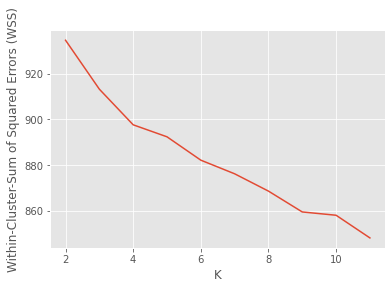

In [84]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [88]:
# setting the kmeans to use k-means++ and the number of clusters to 4
kmeans = cluster.KMeans(n_clusters=4 ,init="k-means++")
kmeans = kmeans.fit(vecs2)


In [60]:
vecs2df['Clusters'] = kmeans.labels_

In [61]:
vecs2df

,100daysofcod,5g,acceler,accept,access,accord,actual,ad,adopt,advanc,advantag,advisori,affect,age,agent,ai,aiart,aiethic,aim,ainew,aithor,aitypo,al,algorithm,allow,also,amp,analysi,analyt,analyticsinsight,analyticsinsightmagazin,analyz,annual,anoth,appli,applic,appoint,approach,april,ar,art,articl,artifici,artificial,artificial_intellig,artificialintellig,artist,assess,assist,auto,autom,autonom,bas,basic,becom,benefit,best,better,big,bigdata,bin,blockchain,blog,bodh,book,boom,bot,boulevard,brain,brand,break,bring,build,built,busi,ca,call,cancer,capabl,care,career,case,cc,centr,ceo,chain,challeng,chang,chatbot,check,china,citi,click,closer,cloud,cloudcomput,co,code,cognit,collect,combin,command,committe,commun,compani,compel,complex,comput,computervis,confer,connect,conscious,consid,content,control,copi,cost,could,counter,countri,cours,creat,creativ,creator,crore,crypto,current,custom,cyber,cybersecur,data,dataanalyt,datasci,datascientist,day,deep,deeplearn,demand,depart,design,detail,detect,develop,devop,diarrhea,differ,digest,digit,digitalart,digitaltransform,director,discoveri,discuss,diseas,divers,dl,dog,download,driv,driven,dustbin,dx,ebook,econom,edit,educ,effect,elbash,elonmusk,emerg,end,engin,enhanc,estat,ethic,even,event,ever,everyday,exampl,expect,experi,expert,explain,explor,face,fake,fart,featur,feel,field,find,finperform,fintech,first,follow,forecast,form,found,free,fundament,futur,gain,game,gaya,gener,generativeart,get,global,go,goal,good,googl,got,govern,gpt,granola,great,group,grow,growth,gujarat_welcomes_modiji,hand,head,health,healthcar,healthtech,help,high,home,houston,http,human,ibm,icymi,idea,identifi,iim,iiot,imag,impact,implement,import,importedgovtnotaccept,improv,includ,increas,incred,industri,inform,initi,innov,insid,insight,instead,institut,insurtech,integr,intel,intellig,intelligence,intelligencefactori,interact,interest,intern,interpret,intoainew,invest,iot,issu,javascript,jblefevre60,job,join,keep,key,kindl,know,knowledg,languag,last,latest,launch,law,lead,learn,led,level,leverag,life,light,like,limit,link,list,listen,live,ll,long,look,love,machin,machine,machinelearn,major,make,man,manag,mani,market,master,may,mayb,mean,media,medic,medicin,meet,metavers,mi,microsoft,mind,miss,ml,mlbox,model,modi,monday,movi,must,nation,natur,need,network,neural,neuralnetwork,new,news,next,nft,nftart,nftartist,nftcommun,nicochan33,nightcaf,nightcafestudio,nlp,nlu,number,offer,offic,one,onlin,op,openai,opensea,opportun,order,organ,outcom,overal,overview,packag,panda,paper,part,payment,peopl,person,philosophi,photo,physic,place,plan,platform,play,pleas,pm,podcast,point,polit,poo,possibl,post,pow,power,practic,precis,predict,present,problem,process,product,profession,program,programm,project,provid,public,publish,python,quantum,question,ramsey,rate,re,read,readi,real,realiti,reason,record,reduc,region,regist,regul,report,rescu,research,resign,respons,rest,retail,right,risk,robot,role,ronald_vanloon,rpa,rss,rt,russia,sale,say,school,scienc,scientist,scifi,sector,secur,see,self,seri,servic,set,shape,share,short,show,sign,simul,smart,social,societi,softwar,solar,solut,solv,someth,song,sound,sourc,space,special,start,startup,state,step,stock,stori,strategi,student,studi,stupid,success,summer,super,suppli,support,surviv,sustain,system,take,talk,target,team,tech,technolog,term,text,thank,thing,think,thought,thousand,three,thrill,time,today,tool,top,topic,train,transform,trend,tri,trust,turd,tweet,twitter,two,typo,understand,uniqu,unit,univers,updat,us,use,user,util,valu,via,video,virtual,virtualr,vision,visit,visual,vr,want,war,watch,way,web,webinar,week,well,wewantdata,win,work,world,would,write,written,year,youtub,Clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188344,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [89]:
from sklearn.decomposition import PCA

#creating teh cluster prediction to graph
clusters = kmeans.predict(vecs2)

# the PCA is trained off the dense version of tfidf
pca = PCA(n_components=2)

two_dim = pca.fit_transform(vecs2.todense())

# saving the PCA values to plot
scatter_x = two_dim[:, 0] # first principle component
scatter_y = two_dim[:, 1] # second principle component

C:\Users\Morga\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


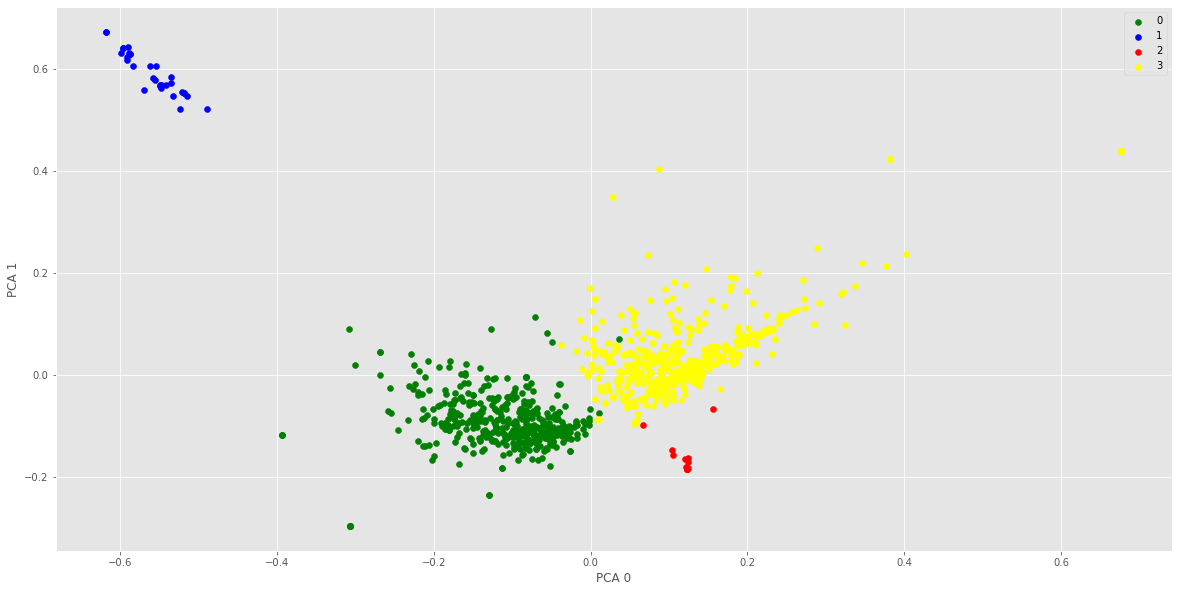

In [90]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# Selecting the color for each cluster
cmap = {0: 'green', 1: 'blue', 2: 'red', 3: 'yellow'}

#Producing a scatter plot were each cluster is the group and selecting the color
# also creating legend with the color to the grouping
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()